In [1]:
#Import libraries
import sys
import pandas as pd
import pandas.io.sql as pdsql
import pyodbc
import matplotlib.pyplot as plt
from   IPython.display import HTML
import folium
import pymssql
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
from pandas import DataFrame
from patsy import dmatrices
import random
from statsmodels.discrete.discrete_model import Logit
from sklearn import ensemble, feature_extraction, preprocessing

# Set iPython to display visualization inline
%matplotlib inline

In [2]:
print 'Python version ' + sys.version
print 'Pandas version: ' + pd.__version__

Python version 2.7.9 |Anaconda 2.2.0 (x86_64)| (default, Dec 15 2014, 10:37:34) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version: 0.16.0


In [3]:
#For Mac OS
Location0 = r'/Users/viral.parikh/Desktop/External_Datasets/kaggle/otto/train.csv'
Location1 = r'/Users/viral.parikh/Desktop/External_Datasets/kaggle/otto/test.csv'
Location2 = r'/Users/viral.parikh/Desktop/External_Datasets/kaggle/otto/sampleSubmission.csv'

train = pd.read_csv(Location0)
test = pd.read_csv(Location1)
sample = pd.read_csv(Location2)

train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
train.groupby('target')['id'].count()

target
Class_1     1929
Class_2    16122
Class_3     8004
Class_4     2691
Class_5     2739
Class_6    14135
Class_7     2839
Class_8     8464
Class_9     4955
Name: id, dtype: int64

In [5]:
#treat class_1 to class_9 as continuous variable

#otto1.loc[otto1.target_mod == 'Class_1', 'target_mod'] = 1
#otto1.loc[otto1.target_mod == 'Class_2', 'target_mod'] = 2
#otto1.loc[otto1.target_mod == 'Class_3', 'target_mod'] = 3
#otto1.loc[otto1.target_mod == 'Class_4', 'target_mod'] = 4
#otto1.loc[otto1.target_mod == 'Class_5', 'target_mod'] = 5
#otto1.loc[otto1.target_mod == 'Class_6', 'target_mod'] = 6
#otto1.loc[otto1.target_mod == 'Class_7', 'target_mod'] = 7
#otto1.loc[otto1.target_mod == 'Class_8', 'target_mod'] = 8
#otto1.loc[otto1.target_mod == 'Class_9', 'target_mod'] = 9

In [6]:
# convert categorical variables into something meaningful

# dummify target_mod feature
#dummy_ranks = pd.get_dummies(otto1['target_mod'], prefix='Class')
#otto2 = otto1.join(dummy_ranks.ix[:, 'Class_1':])

#otto2.head()

In [7]:
#otto2.info()

In [8]:
# drop ids and get labels
labels = train.target.values
train1 = train.drop('id', axis=1)
X = train1.drop('target', axis=1)

test = test.drop('id', axis=1)

In [9]:
# encode labels 
lbl_enc = preprocessing.LabelEncoder()
y = lbl_enc.fit_transform(labels)

In [10]:
train.target.values

array(['Class_1', 'Class_1', 'Class_1', ..., 'Class_9', 'Class_9',
       'Class_9'], dtype=object)

In [11]:
y

array([0, 0, 0, ..., 8, 8, 8])

In [12]:
print X.shape
print y.shape

(61878, 93)
(61878,)


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

/Users/viral.parikh/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:332: UserWarning: StandardScaler assumes floating point values as input, got int64
  "got %s" % (estimator, X.dtype))


In [14]:
print X.shape
print X1.shape

(61878, 93)
(61878, 93)


In [19]:
X.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [21]:
X1

array([[ 0.40209324, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       ..., 
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
        -0.38693809, -0.10496314],
       [ 0.40209324, -0.21010603, -0.30716546, ...,  1.33702606,
         9.792457  , -0.10496314],
       [-0.25350808, -0.21010603, -0.30716546, ..., -0.12951551,
         1.64894093, -0.10496314]])

# Training & Validation Samples

In [17]:
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print X_train.shape
print X_val.shape
print y_train.shape
print y_val.shape

(49502, 93)
(12376, 93)
(49502,)
(12376,)


In [22]:
from sklearn.cross_validation import train_test_split
X1_train, X1_val = train_test_split(X1, test_size=0.2, random_state=42)

In [23]:
print X1_train.shape
print X1_val.shape

(49502, 93)
(12376, 93)


# Case 1 - Predicting Class Probabilities for Every Record

# Try Feature Reduction using PCA

In [14]:
#Import PCA
from sklearn.decomposition import PCA

#for larger dimensions execute this code
def do_pca(d,n):
    pca = PCA(n_components=n)
    X = pca.fit_transform(d)
    print pca.explained_variance_ratio_
    return X, pca

In [15]:
# 3-25 variables

X3, pca3=do_pca(X_train,3)
X4, pca4=do_pca(X_train,4)
X5, pca5=do_pca(X_train,5)
X6, pca6=do_pca(X_train,6)
X7, pca7=do_pca(X_train,7)
X8, pca8=do_pca(X_train,8)
X9, pca9=do_pca(X_train,9)
X10, pca10=do_pca(X_train,10)
X11, pca11=do_pca(X_train,11)
X12, pca12=do_pca(X_train,12)
X13, pca13=do_pca(X_train,13)
X14, pca14=do_pca(X_train,14)
X15, pca15=do_pca(X_train,15)
X16, pca16=do_pca(X_train,16)
X17, pca17=do_pca(X_train,17)
X18, pca18=do_pca(X_train,18)
X19, pca19=do_pca(X_train,19)
X20, pca20=do_pca(X_train,20)
X21, pca21=do_pca(X_train,21)
X22, pca22=do_pca(X_train,22)
X23, pca23=do_pca(X_train,23)
X24, pca24=do_pca(X_train,24)
X25, pca25=do_pca(X_train,25)

[ 0.11747973  0.08501065  0.07110771]
[ 0.11747973  0.08501065  0.07110771  0.0621262 ]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255
  0.03452792]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255
  0.03452792  0.03141811]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255
  0.03452792  0.03141811  0.0291649 ]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255
  0.03452792  0.03141811  0.0291649   0.02708723]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255
  0.03452792  0.03141811  0.0291649   0.02708723  0.02592272]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255
  0.03452792  0.03141811  0.0291649   0.02708723  0.02592272  0.02208203]
[ 0.11747973  0.08501065  0.07110771  0.0621262   0.04380096  0.03949255
 

In [16]:
print np.sum(pca3.explained_variance_ratio_)
print np.sum(pca4.explained_variance_ratio_)
print np.sum(pca5.explained_variance_ratio_)
print np.sum(pca6.explained_variance_ratio_)
print np.sum(pca7.explained_variance_ratio_)
print np.sum(pca8.explained_variance_ratio_)
print np.sum(pca9.explained_variance_ratio_)
print np.sum(pca10.explained_variance_ratio_)
print np.sum(pca11.explained_variance_ratio_)
print np.sum(pca12.explained_variance_ratio_)
print np.sum(pca13.explained_variance_ratio_)
print np.sum(pca14.explained_variance_ratio_)
print np.sum(pca15.explained_variance_ratio_)
print np.sum(pca16.explained_variance_ratio_)
print np.sum(pca17.explained_variance_ratio_)
print np.sum(pca18.explained_variance_ratio_)
print np.sum(pca19.explained_variance_ratio_)
print np.sum(pca20.explained_variance_ratio_)
print np.sum(pca21.explained_variance_ratio_)
print np.sum(pca22.explained_variance_ratio_)
print np.sum(pca23.explained_variance_ratio_)
print np.sum(pca24.explained_variance_ratio_)
print np.sum(pca25.explained_variance_ratio_)

0.273598082799
0.335724284475
0.379525240262
0.41901779105
0.453545708812
0.484963815446
0.514128717
0.541215947548
0.567138664695
0.589220691011
0.610838547573
0.630143671832
0.649044440617
0.667311404379
0.684625730067
0.701576075653
0.716897771143
0.731015181239
0.743410071586
0.755092778265
0.765555725317
0.775607920921
0.785422840605


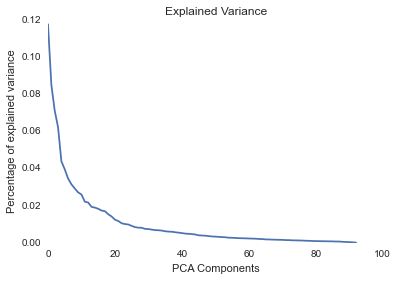

In [11]:
from sklearn.decomposition import PCA

pca_big = PCA().fit(X_train, y_train)
plt.title("Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(pca_big.explained_variance_ratio_);

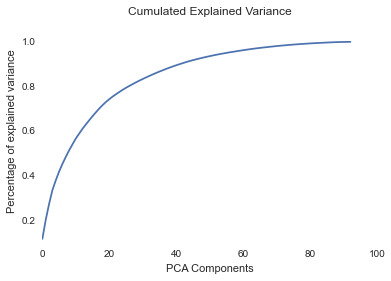

In [12]:
plt.title("Cumulated Explained Variance")
plt.ylabel("Percentage of explained variance")
plt.xlabel("PCA Components")
plt.plot(np.cumsum(pca_big.explained_variance_ratio_));

In [88]:
i = np.identity(X_train.shape[1])  # identity matrix
coef25 = pca25.transform(i)
coef25

array([[-4.1689269 ,  1.58282917,  0.32008677, ..., -1.33543035,
         0.06869151, -0.11718555],
       [-4.12560846,  1.51855035,  0.36911994, ..., -1.36098453,
         0.25577776, -0.1410627 ],
       [-4.20529171,  1.2188788 ,  0.2736648 , ..., -1.48666763,
         0.18741462, -0.2282543 ],
       ..., 
       [-4.16522907,  1.56915378,  0.35538487, ..., -1.2772764 ,
         0.49220583, -0.4843779 ],
       [-4.19892371,  1.54604879,  0.35068708, ..., -1.36058862,
         0.18395228, -0.17306943],
       [-4.178975  ,  1.56380137,  0.35527925, ..., -1.37908623,
         0.24362425, -0.09848784]])

In [89]:
df=pd.DataFrame(coef25, columns=['PC-1', 'PC-2', 'PC-3','PC-4', 'PC-5', 'PC-6','PC-7', 'PC-8', 'PC-9','PC-10', 'PC-11', 'PC-12','PC-13', 'PC-14', 'PC-15','PC-16', 'PC-17', 'PC-18','PC-19', 'PC-20', 'PC-21', 'PC-22', 'PC-23','PC-24', 'PC-25'])

In [31]:
print X25.size
print X.size

print X25

1237550
5754654
[[ -4.15358054   0.87515003  -0.26737201 ...,   0.21865017  -0.32608121
   -1.54835833]
 [ -2.12581218   4.61192025  -1.53631761 ...,  -1.69190168   0.69084656
   -1.23909781]
 [ 18.93078064   9.82369663  -3.40745024 ...,   0.4325965    0.78507196
   -4.66266097]
 ..., 
 [ -5.26405671  -2.68331455   0.37534636 ...,   1.82026202  -1.577018
    2.20907164]
 [ -4.45960933   1.97682064  -0.30607068 ...,  -0.33639432   0.58176729
    0.04145206]
 [ -3.56461968  -7.18959339   1.78415436 ...,  -3.10781872   1.26068378
   -0.23413832]]


In [38]:
X25_val, pca25_val=do_pca(X_val,25)
print np.sum(pca25_val.explained_variance_ratio_)

[ 0.12085276  0.09194513  0.06402278  0.04581922  0.04069617  0.03654315
  0.0325953   0.03126145  0.02911303  0.0264054   0.02525808  0.02306281
  0.02139453  0.02109977  0.02072481  0.01920998  0.01784659  0.01745165
  0.01604523  0.01424084  0.01289138  0.01239103  0.01168968  0.01137299
  0.01096687]
0.774900652448


# Method 1 - Random Forest Classifier (orig vars)

In [38]:
%time
# train a random forest classifier (on raw data as is)

clf_rf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=4141, n_estimators=300, verbose=2, oob_score=True) #max_features = 50
clf_rf.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    8.6s remaining:    5.2s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    8.9s remaining:  1.0min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    8.9s finished


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.01 µs
building tree 1 of 38building tree 1 of 38building tree 1 of 38

 
 building tree 1 of 37building tree 1 of 38building tree 1 of 37
 building tree 1 of 37

building tree 1 of 37

building tree 2 of 37
building tree 2 of 38
building tree 2 of 38
building tree 2 of 37
building tree 2 of 38
building tree 2 of 38
building tree 2 of 37
building tree 2 of 37
building tree 3 of 38
building tree 3 of 37
building tree 3 of 38
building tree 3 of 37
building tree 3 of 37
building tree 3 of 38
building tree 3 of 38
building tree 3 of 37
building tree 4 of 37
building tree 4 of 38
building tree 4 of 38
building tree 4 of 37
building tree 4 of 37
building tree 4 of 38
building tree 4 of 38
building tree 4 of 37
building tree 5 of 37
building tree 5 of 38
building tree 5 of 37
building tree 5 of 38
building tree 5 of 38
building tree 5 of 38
building tree 5 of 37
building tree 5 of 37
building tree 6 of 37
building tree 6 of 37
building 

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=300, n_jobs=-1,
            oob_score=True, random_state=4141, verbose=2)

In [39]:
# predict on training set
y_train_predicted_rf = clf_rf.predict_proba(X_train)

from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, recall_score, precision_score

#accuracy_train_1=accuracy_score(y_train, y_train_predicted_rf)
#cm_train_1=confusion_matrix(y_train, y_train_predicted_rf)
log_loss_train_1=log_loss(y_train, y_train_predicted_rf)

print log_loss_train_1

0.141536846699


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.8s remaining:    5.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.9s finished


In [40]:
# predict on validation set
y_val_predicted_rf = clf_rf.predict_proba(X_val)

from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, recall_score, precision_score

log_loss_val_1=log_loss(y_val, y_val_predicted_rf)

log_loss_val_1

[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.2s remaining:    1.7s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


0.57065511324214913

In [37]:
#print('RFC LogLoss {log_loss_val_1}'.format(log_loss_val_1=log_loss(y_val, y_val_predicted_rf)))

In [41]:
# cross validation

n_samples, n_features = X.shape

from sklearn.cross_validation import ShuffleSplit
from sklearn.cross_validation import cross_val_score

clf_rf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=4141, n_estimators=300, verbose=2)

cv = ShuffleSplit(n_samples, n_iter=10, test_size=0.1,random_state=0)

test_scores = cross_val_score(clf_rf, X, y, cv=cv, n_jobs=2, scoring='log_loss')
test_scores

building tree 1 of 38
building tree 1 of 38
 building tree 1 of 38
 building tree 1 of 38
 building tree 1 of 38
 building tree 1 of 37
 building tree 1 of 37
 building tree 1 of 37
 building tree 1 of 37
 building tree 1 of 38
 building tree 1 of 38
 building tree 1 of 38
 building tree 1 of 37
 building tree 1 of 37
 building tree 1 of 37
 building tree 1 of 37
building tree 2 of 38building tree 2 of 38
building tree 2 of 38

building tree 2 of 38
 building tree 2 of 38
building tree 2 of 38
building tree 2 of 37
building tree 2 of 37
building tree 2 of 38
building tree 2 of 38
building tree 2 of 37
 building tree 2 of 37
 building tree 2 of 37
 building tree 2 of 37
building tree 2 of 37
 building tree 2 of 37
building tree 3 of 37building tree 3 of 38

building tree 3 of 38
 building tree 3 of 38
building tree 3 of 38
building tree 3 of 37
building tree 3 of 38
 building tree 3 of 38
building tree 3 of 38
building tree 3 of 38
building tree 3 of 37
building tree 3 of 37
building tr

[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   21.8s remaining:   13.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   21.9s remaining:   13.2s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:   22.4s remaining:  2.6min
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:   22.4s remaining:  2.6min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   22.4s finished
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   22.4s finished
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.2s remaining:    1.2s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.2s remaining:    1.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:   21.6s remaining:   13.0s


array([-0.57293419, -0.55737046, -0.56489993, -0.57605514, -0.55162178,
       -0.57394717, -0.56472115, -0.558204  , -0.56404541, -0.57103109])


building tree 14 of 38building tree 13 of 37

building tree 13 of 37building tree 14 of 38

building tree 14 of 37building tree 14 of 38building tree 14 of 37

building tree 14 of 38

 building tree 14 of 38
 building tree 14 of 37
building tree 14 of 37
building tree 14 of 38building tree 14 of 38

building tree 14 of 37
building tree 14 of 38
building tree 14 of 37building tree 14 of 37

building tree 15 of 38building tree 14 of 37

 building tree 15 of 38
building tree 15 of 38building tree 15 of 37

 building tree 15 of 38
building tree 15 of 37
building tree 15 of 37
building tree 15 of 38
building tree 15 of 38
building tree 15 of 38 building tree 15 of 37

building tree 15 of 38building tree 15 of 37

building tree 15 of 37 building tree 15 of 37

building tree 16 of 38building tree 15 of 37
building tree 16 of 38

building tree 16 of 38building tree 16 of 37

building tree 16 of 37
 building tree 16 of 38
 building tree 16 of 38
building tree 16 of 37building tree 16 of 37

bu

In [42]:
from scipy.stats import sem

def mean_score(scores):
    """Print the empirical mean score and standard error of the mean."""
    return ("Mean score: {0:.3f} (+/-{1:.3f})").format(np.mean(scores), 2 * sem(scores))

building tree 36 of 38
building tree 35 of 37building tree 37 of 38

building tree 35 of 38building tree 37 of 37

building tree 37 of 37
building tree 35 of 38
building tree 37 of 37
building tree 35 of 37building tree 37 of 38

building tree 35 of 37building tree 37 of 38

 building tree 36 of 37
building tree 37 of 37building tree 36 of 38building tree 37 of 38


building tree 36 of 38building tree 38 of 38

building tree 36 of 37building tree 38 of 38

building tree 36 of 38
building tree 38 of 38building tree 36 of 38

building tree 38 of 38building tree 36 of 37

building tree 36 of 37
building tree 1 of 38building tree 37 of 37building tree 1 of 38
 building tree 1 of 38
 building tree 1 of 38
 building tree 1 of 37
 building tree 1 of 37
 building tree 1 of 37
 building tree 1 of 37


building tree 37 of 38
building tree 37 of 38
building tree 37 of 37
building tree 37 of 38
building tree 2 of 38building tree 37 of 37

building tree 2 of 38
 building tree 37 of 38
 building tre

In [43]:
print(mean_score(test_scores))

Mean score: -0.565 (+/-0.005)
building tree 22 of 37
building tree 23 of 38building tree 22 of 37

 building tree 23 of 37
 building tree 23 of 37
building tree 22 of 37
building tree 23 of 38
building tree 23 of 38building tree 23 of 37

building tree 23 of 38 building tree 23 of 38

building tree 23 of 37
building tree 23 of 38building tree 23 of 38

building tree 23 of 38
building tree 23 of 37
building tree 23 of 37
building tree 24 of 38building tree 23 of 37

building tree 24 of 37building tree 23 of 37

 building tree 24 of 37
building tree 24 of 38building tree 24 of 37

building tree 24 of 38
building tree 24 of 38
building tree 24 of 38
building tree 24 of 38
building tree 24 of 38building tree 24 of 38

building tree 24 of 37
building tree 24 of 37
building tree 24 of 37
building tree 25 of 38building tree 24 of 37

building tree 25 of 38building tree 24 of 37

building tree 25 of 37
building tree 25 of 38building tree 25 of 37

 building tree 25 of 37
building tree 25 of 38

In [25]:
# predict on test set
test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [26]:
y_test_predicted = clf_rf.predict_proba(test)

[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.9s remaining:    6.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.9s finished


In [27]:
print y_test_predicted
print y_test_predicted.size

[[ 0.    0.29  0.16 ...,  0.02  0.    0.01]
 [ 0.03  0.03  0.03 ...,  0.02  0.34  0.  ]
 [ 0.    0.01  0.01 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.45  0.32 ...,  0.03  0.01  0.02]
 [ 0.    0.59  0.08 ...,  0.01  0.    0.  ]
 [ 0.    0.55  0.29 ...,  0.07  0.    0.  ]]
1299312


In [28]:
#create submission file

preds_test = pd.DataFrame(y_test_predicted, index=sample.id.values)
preds_test.to_csv('/Users/viral.parikh/Desktop/External_Datasets/kaggle/otto/vp_rfc_test.csv', index_label='id')

# Method 2 - Random Forest Classifier (scalar variables)

In [45]:
%time
# train a random forest classifier (on raw data as is)

clf_rf_scalar = ensemble.RandomForestClassifier(n_jobs=-1, random_state=4141, n_estimators=100, verbose=2, oob_score=True) #max_features = 50
clf_rf_scalar.fit(X1_train, y_train)

[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    3.0s remaining:    1.8s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    3.2s remaining:   22.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.2s finished


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 15 µs
building tree 1 of 13
building tree 1 of 13
building tree 1 of 13
building tree 1 of 13
building tree 1 of 12
building tree 1 of 12
building tree 1 of 12
building tree 1 of 12
building tree 2 of 12
building tree 2 of 12
building tree 2 of 13
building tree 2 of 12
building tree 2 of 13
building tree 2 of 13
building tree 2 of 12
building tree 2 of 13
building tree 3 of 12
building tree 3 of 12
building tree 3 of 13
building tree 3 of 13
building tree 3 of 13
building tree 3 of 13
building tree 3 of 12
building tree 3 of 12
building tree 4 of 12
building tree 4 of 12
building tree 4 of 13
building tree 4 of 13
building tree 4 of 12
building tree 4 of 13
building tree 4 of 13
building tree 4 of 12
building tree 5 of 12
building tree 5 of 12
building tree 5 of 13
building tree 5 of 13
building tree 5 of 13
building tree 5 of 13
building tree 5 of 12
building tree 5 of 12
building tree 6 of 12
building tree 6 of 12
building tree 

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=-1,
            oob_score=True, random_state=4141, verbose=2)


building tree 18 of 37building tree 19 of 38

building tree 19 of 38
building tree 18 of 37
building tree 19 of 38
building tree 18 of 38
building tree 19 of 37 building tree 18 of 37
building tree 19 of 38

building tree 18 of 37
building tree 19 of 37
building tree 19 of 38
building tree 20 of 37building tree 19 of 38

building tree 19 of 38
building tree 20 of 38building tree 19 of 37

building tree 20 of 38
building tree 19 of 38
building tree 20 of 37
building tree 19 of 37
building tree 20 of 38
 building tree 19 of 37
building tree 20 of 37building tree 19 of 37
building tree 20 of 38

building tree 20 of 38building tree 20 of 37

building tree 20 of 38
building tree 21 of 37building tree 20 of 38

building tree 21 of 38building tree 20 of 37

building tree 21 of 37
building tree 20 of 37
building tree 21 of 38
building tree 20 of 38
building tree 21 of 38
 building tree 20 of 37
 building tree 20 of 37
building tree 21 of 38
building tree 21 of 37
building tree 21 of 38buildin

In [46]:
# predict on training set
y_train_predicted_rf_scalar = clf_rf_scalar.predict_proba(X1_train)

from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, recall_score, precision_score

#accuracy_train_1=accuracy_score(y_train, y_train_predicted_rf)
#cm_train_1=confusion_matrix(y_train, y_train_predicted_rf)
log_loss_train_1_scalar=log_loss(y_train, y_train_predicted_rf_scalar)

print log_loss_train_1_scalar

0.141850761054


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.3s remaining:    2.2s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished


In [47]:
# predict on validation set
y_val_predicted_rf_scalar = clf_rf_scalar.predict_proba(X1_val)

from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, recall_score, precision_score

log_loss_val_1_scalar=log_loss(y_val, y_val_predicted_rf_scalar)

print log_loss_val_1_scalar

0.602890285032


[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


# Method 3 - Random Forest Classifier on PCA Components

In [35]:
%time
# train a random forest classifier (on PCA components)
clf_pca_rf = ensemble.RandomForestClassifier(n_jobs=-1, random_state=4141, n_estimators=100, verbose=2) #max_features = 50
clf_pca_rf.fit(X25, y_train)

[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    6.1s remaining:    3.7s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    6.4s remaining:   44.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    6.5s finished


CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs
building tree 1 of 13
building tree 1 of 13
building tree 1 of 13
building tree 1 of 13
building tree 1 of 12
building tree 1 of 12
building tree 1 of 12
building tree 1 of 12
building tree 2 of 13
building tree 2 of 12
building tree 2 of 13
building tree 2 of 12
building tree 2 of 12
building tree 2 of 13
building tree 2 of 13
building tree 2 of 12
building tree 3 of 12
building tree 3 of 13
building tree 3 of 12
building tree 3 of 13
building tree 3 of 13
building tree 3 of 13
building tree 3 of 12
building tree 3 of 12
building tree 4 of 13
building tree 4 of 13
building tree 4 of 12
building tree 4 of 13
building tree 4 of 13
building tree 4 of 12
building tree 4 of 12
building tree 4 of 12
building tree 5 of 13
building tree 5 of 12
building tree 5 of 13
building tree 5 of 13
building tree 5 of 13
building tree 5 of 12
building tree 5 of 12
building tree 5 of 12
building tree 6 of 12
building tree 6 of 13
building tre

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=4141, verbose=2)

In [36]:
# predict on training set
y_train_predicted_pca_rf = clf_pca_rf.predict_proba(X25)

from sklearn.metrics import log_loss
score_train_2=log_loss(y_train, y_train_predicted_pca_rf)

score_train_2

[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.3s remaining:    0.2s
[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.3s remaining:    2.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.3s finished


0.14791948920738679

In [39]:
# predict on validation set
y_val_predicted_pca_rf = clf_pca_rf.predict_proba(X25_val)

from sklearn.metrics import log_loss
score_val_2=log_loss(y_val, y_val_predicted_pca_rf)

score_val_2

[Parallel(n_jobs=8)]: Done   1 out of   8 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   5 out of   8 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


1.772435568158315

Log Loss score on Validation Set is v high using PCA + Random Forest Method

# Method 3 - Logistic Regression Classifier

In [49]:
%time
# train a logistic regression classifier (on raw data as is)

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [50]:
# predict on training set
y_train_predicted_lr = clf_lr.predict_proba(X_train)

from sklearn.metrics import log_loss
score_train_3=log_loss(y_train, y_train_predicted_lr)

score_train_3

0.66050283488695649

In [46]:
# predict on test set
y_val_predicted_lr = clf_lr.predict_proba(X_val)

from sklearn.metrics import log_loss
score_val_3=log_loss(y_val, y_val_predicted_lr)

score_val_3

NameError: name 'clf_lr' is not defined

# Method 4 - Neural Nets (vars as is)

In [48]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from lasagne.layers import DenseLayer
from lasagne.layers import InputLayer
from lasagne.layers import DropoutLayer
from lasagne.nonlinearities import softmax
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

In [49]:
def load_train_data(path):
    df = pd.read_csv(path)
    X = df.values.copy()
    np.random.shuffle(X)
    X, labels = X[:, 1:-1].astype(np.float32), X[:, -1]
    encoder = LabelEncoder()
    y = encoder.fit_transform(labels).astype(np.int32)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    return X, y, encoder, scaler

In [50]:
X, y, encoder, scaler = load_train_data('/Users/viral.parikh/Desktop/External_Datasets/kaggle/otto/train.csv')

In [53]:
print X.shape
print y.shape

(61878, 93)
(61878,)


In [18]:
num_classes = len(encoder.classes_)
num_features = X.shape[1]

In [19]:
layers0 = [('input', InputLayer),
           ('dense0', DenseLayer),
           ('dropout', DropoutLayer),
           ('dense1', DenseLayer),
           ('output', DenseLayer)]

In [22]:
net0 = NeuralNet(layers=layers0,
                 
                 input_shape=(None, num_features),
                 dense0_num_units=200,
                 dropout_p=0.5,
                 dense1_num_units=200,
                 output_num_units=num_classes,
                 output_nonlinearity=softmax,
                 
                 update=nesterov_momentum,
                 update_learning_rate=0.01,
                 update_momentum=0.9,
                 
                 eval_size=0.2,
                 verbose=1,
                 max_epochs=40)

In [23]:
net0.fit(X, y)

  DenseLayer        	(None, 9)           	produces       9 outputs
  DenseLayer        	(None, 200)         	produces     200 outputs
  DropoutLayer      	(None, 200)         	produces     200 outputs
  DenseLayer        	(None, 200)         	produces     200 outputs
  InputLayer        	(None, 93)          	produces      93 outputs

 Epoch  |  Train loss  |  Valid loss  |  Train / Val  |  Valid acc  |  Dur
--------|--------------|--------------|---------------|-------------|-------
     1  |    0.916319  |    0.678342  |     1.350823  |     74.84%  |  1.0s
     2  |    0.701885  |    0.634955  |     1.105409  |     75.85%  |  1.0s
     3  |    0.664739  |    0.613384  |     1.083725  |     76.56%  |  1.0s
     4  |    0.640912  |    0.600062  |     1.068077  |     76.91%  |  1.0s
     5  |    0.624708  |    0.588426  |     1.061660  |     77.25%  |  1.0s
     6  |    0.613800  |    0.579893  |     1.058472  |     77.65%  |  1.0s
     7  |    0.604911  |    0.575072  |     1.051887  | 

NeuralNet(X_tensor_type=<function matrix at 0x10d17a410>,
     batch_iterator_test=<nolearn.lasagne.BatchIterator object at 0x10e265710>,
     batch_iterator_train=<nolearn.lasagne.BatchIterator object at 0x10e265690>,
     dense0_num_units=200, dense1_num_units=200, dropout_p=0.5,
     eval_size=0.2, input_shape=(None, 93),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('dense0', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout', <class 'lasagne.layers.noise.DropoutLayer'>), ('dense1', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=<function negative_log_likelihood at 0x10e275aa0>, max_epochs=40,
     more_params={}, on_epoch_finished=(), on_training_finished=(),
     output_nonlinearity=<theano.tensor.nnet.nnet.Softmax object at 0x10c772fd0>,
     output_num_units=9, regression=False,
     update=<function nesterov_momentum at 0x10e2755f0>,
     update_learning_rate=0.01, update_momentum=0.9,
   

# Method 5 - Neural Nets (scalar vars)

# Case 2 - Predicting Class for Every Record

http://scikit-learn.org/stable/modules/multiclass.html

# Method 1 - One vs Rest Classifier

In [60]:
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

In [61]:
%time
ovr = OneVsRestClassifier(LinearSVC(random_state=0))
ovr.fit(X_train, y_train)
print ovr.estimators_

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 5.01 µs
[LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_we

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

predicted_val = ovr.predict(X_val)

print 'accuracy', accuracy_score(predicted_val, y_val)
print confusion_matrix(predicted_val, y_val)

accuracy 0.749030381383
[[ 127    2    0    0    0   10    9   26   52]
 [  46 2828 1035  382   22   39   96   35   73]
 [   2  339  464   83    0    8   52    9    1]
 [   0    2    1   47    0    0    0    0    0]
 [   2    9    0    3  526    0    1    1    0]
 [  34   19    8   34    0 2625   48   51   50]
 [   4   17   21   10    0   39  304   15    4]
 [  86   12   16    1    1   63   46 1586   64]
 [  55    3    0    0    0   43    0   22  763]]


In [64]:
print predicted_val
print predicted_val.size

[7 5 7 ..., 1 1 1]
12376


In [65]:
test.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,0,0,0,0,0,0,0,0,0,3,...,0,0,11,1,20,0,0,0,0,0
1,2,2,14,16,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,0,1,12,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,1,0,0,1,0,0,1,2,0,3,...,0,0,0,0,0,0,0,9,0,0


In [66]:
#predict on test set
predicted_test = ovr.predict(test)
print predicted_test
print predicted_test.size

In [48]:
#create submission file

#preds = pd.DataFrame(predicted_test, index=sample.id.values)
#preds.to_csv('/Users/viral.parikh/Desktop/External_Datasets/kaggle/otto/method1.csv', index_label='id')

# Method 2 - One vs One Classifier

In [68]:
from sklearn import datasets
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split

In [69]:
%time
ovr2 = OneVsOneClassifier(LinearSVC(random_state=0))
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
ovr2.fit(X_train, y_train)
print ovr2.estimators_

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
[LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=0, tol=0.0001, verbose=0), LinearSVC(C=1.0, class_we

In [70]:
print X_train.size
print X_val.size
print y_train.size
print y_val.size

4603686
1150968
49502
12376


In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

predicted_val = ovr2.predict(X_val)

print 'accuracy', accuracy_score(predicted_val, y_val)
print confusion_matrix(predicted_val, y_val)

 accuracy 0.767129928895
[[ 162    8    3    2    1   23   21   55   60]
 [  16 2754  981  263   25   17   69   20   17]
 [   0  391  567   43    0    6   48    7    2]
 [   1   33   25  190    0    9    8    0    2]
 [   0    9    1    5  524    1    2    1    1]
 [  24    5    3   13    1 2609   43   55   53]
 [   9   24   25    8    0   54  355   24    5]
 [  55    8    8    1    1   58   29 1507   36]
 [  73    9    0    1    1   44    3   33  826]]


In [73]:
print predicted_val
print predicted_val.size

[4 6 2 ..., 1 7 2]
12376


In [74]:
#predict on test set
predicted_test = ovr2.predict(test)
print predicted_test
print predicted_test.size

[3 5 5 ..., 3 1 2]
144368
